In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import graphviz
import pydotplus 
from pandas import DataFrame,Series
from sklearn.linear_model import LinearRegression,RANSACRegressor
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

input_folder = "../dataset"

In [3]:
movie_file = pd.read_csv(input_folder+"/movie_metadata_cleaned_filled_values.csv")
movie_data= DataFrame(movie_file)
movie_data.fillna(movie_data.mean())
movie_data = movie_data.dropna()

#movie_data.head(10)
#len(movie_data)

In [4]:
drop_predictors = ['gross','worldwide_gross','color','movie_title','director_name',
                   'actor_1_name','actor_2_name','actor_3_name','content_rating',
                   'genres','plot_keywords','movie_imdb_link','country','language',
                   'release_date','title_year','aspect_ratio']

#define predictors and predicted values
X = movie_data.drop(drop_predictors, axis=1)
y = movie_data.worldwide_gross

from sklearn import preprocessing

####standardize data to address different scales.
standardized_X = preprocessing.scale(X)
standardized_y = preprocessing.scale(y)

#### split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(standardized_X, standardized_y, train_size=0.7, random_state=0)

reg_model = RANSACRegressor(LinearRegression())

##Train the model using the training sets 
reg_model.fit(X_train, y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

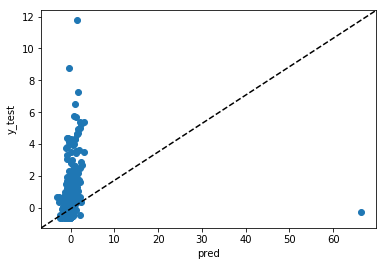

In [9]:
pred = reg_model.predict(X_test)
plt.scatter(pred, y_test, label='worldwide_gross')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')
plt.show()

In [6]:
#Metrics
print("MSE: {0:0.4f}".format(mean_squared_error(y_test, pred)))
print("R2:  {0:0.4f}".format(r2_score(y_test, pred, multioutput='variance_weighted')))

MSE: 4.9005
R2:  -3.2475


In [14]:
# View the regression coefficients
print('Regression Coefficients: \n', reg_model.coef_)
print('Intercept: {:.4f}'.format(reg_model.intercept_)) 

Regression Coefficients: 
 [  2.34166647e-02  -4.92709365e-02  -1.85755633e-02  -8.20816036e-02
  -6.82686937e-01   2.73527567e-01   7.82839323e-01   5.77379512e-01
  -1.09221437e-04   2.89657301e-02  -1.91526587e-02  -5.41771483e-03
  -1.94569996e-01   4.81948340e-02   5.63295445e-02]
Intercept: -0.0158
